[DIY Covid-19 Dashboard Kit](https://github.com/fsmeraldi/diy-covid19dash) (C) Fabrizio Smeraldi, 2020 ([f.smeraldi@qmul.ac.uk](mailto:f.smeraldi@qmul.ac.uk) - [web](http://www.eecs.qmul.ac.uk/~fabri/)). All rights reserved.

# DIY Covid-19 Dashboard

This is a template for your DIY Covid Dashboard, to which you can add the code you developed in the previous notebooks. The dashboard will be displayed using [voila](https://voila.readthedocs.io/en/stable/index.html), a Python dashboarding tool that converts notebooks to standalone dashboards. Contrary to the other libraries we have seen, the ```voila``` package must be installed using *pip* or *conda* but it does not need to be imported - it rather acts at the level of the notebook server. Package ```voila``` is already installed on the EECS JupyterHub as well as in the binder - to install it locally, follow the [instructions](https://voila.readthedocs.io/en/stable/install.html) online.

Broadly speaking, Voila acts by **running all the cells in your notebook** when the dashboard is first loaded; it then hides all code cells and displays all markdown cells and any outputs, including widgets. However, the code is still there in the background and handles any interaction with the widgets. To view this dashboard template rendered in Voila click [here](https://mybinder.org/v2/gh/fsmeraldi/diy-covid19dash/main?urlpath=%2Fvoila%2Frender%2FDashboard.ipynb).

In [221]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API

In [222]:
%matplotlib inline
# make figures larger.
plt.rcParams['figure.dpi'] = 100

## Load initial data from disk

You should include "canned" data in ```.json``` files along with your dashboard. When the dashboard starts, it should load that data (the code below will be hidden when the dashboard is rendered by Voila).

In [223]:
# Load JSON files and store the raw data in some variable. Edit as appropriate.
england_only=[
    'areaType=nation',
    'areaName=England'
]

vaccinated_and_deaths={  # The proportion of vaccinated people and new deaths.
    "date": "date",
    "areaType": "areaType",
    "areaName": "areaName",
    "cumVaccinatedPercentage": "cumVaccinationCompleteCoverageByPublishDatePercentage", 
    # Cumulative vaccination complete coverage by publish date percentage.
    "cases": "newCasesByPublishDate",
    # New cases by publish date.
    "cumCases": "cumCasesByPublishDate",
    # Cumulative cases by publish date.
    "deaths": "newDeaths28DaysByPublishDate",
    # New deaths 28 days of a positive test by publish date.
    "deathPercentage": "newDeaths28DaysByPublishDateChangePercentage" 
    # New deaths within 28 days of a positive test change percentage by publish date.
}

api = Cov19API(filters=england_only, structure=vaccinated_and_deaths)

dateseries = api.get_json()
print(dateseries)



{'data': [{'date': '2021-12-08', 'areaType': 'nation', 'areaName': 'England', 'cumVaccinatedPercentage': None, 'cases': 44019, 'cumCases': 9000391, 'deaths': 134, 'deathPercentage': -0.3}, {'date': '2021-12-07', 'areaType': 'nation', 'areaName': 'England', 'cumVaccinatedPercentage': None, 'cases': 38866, 'cumCases': 8957091, 'deaths': 161, 'deathPercentage': 2.5}, {'date': '2021-12-06', 'areaType': 'nation', 'areaName': 'England', 'cumVaccinatedPercentage': None, 'cases': 41525, 'cumCases': 8918807, 'deaths': 34, 'deathPercentage': 0.3}, {'date': '2021-12-05', 'areaType': 'nation', 'areaName': 'England', 'cumVaccinatedPercentage': None, 'cases': 37396, 'cumCases': 8877883, 'deaths': 41, 'deathPercentage': -3.5}, {'date': '2021-12-04', 'areaType': 'nation', 'areaName': 'England', 'cumVaccinatedPercentage': None, 'cases': 39949, 'cumCases': 8841194, 'deaths': 104, 'deathPercentage': -4.6}, {'date': '2021-12-03', 'areaType': 'nation', 'areaName': 'England', 'cumVaccinatedPercentage': None

In [224]:
print(type(dateseries))

<class 'dict'>


In [225]:
with open("dateseries.json", "wt") as OUTF:
    json.dump(dateseries, OUTF) # Store the data in JSON format

## Wrangle the data

The dashboard should contain the logic to wrangle the raw data into a ```DataFrame``` (or more than one, as required) that will be used for plotting. The wrangling code should be put into a function and called on the data from the JSON file (we'll need to call it again on any data downloaded from the API).  In this template, we just pretend we are wrangling ```rawdata``` and generate a dataframe with some random data

In [226]:
with open("dateseries.json", "rt") as INFILE:
    data=json.load(INFILE)  # open dateseries JSON file

In [227]:
datalist=data['data']  # data['data'] is a list.
datalist

[{'date': '2021-12-08',
  'areaType': 'nation',
  'areaName': 'England',
  'cumVaccinatedPercentage': None,
  'cases': 44019,
  'cumCases': 9000391,
  'deaths': 134,
  'deathPercentage': -0.3},
 {'date': '2021-12-07',
  'areaType': 'nation',
  'areaName': 'England',
  'cumVaccinatedPercentage': None,
  'cases': 38866,
  'cumCases': 8957091,
  'deaths': 161,
  'deathPercentage': 2.5},
 {'date': '2021-12-06',
  'areaType': 'nation',
  'areaName': 'England',
  'cumVaccinatedPercentage': None,
  'cases': 41525,
  'cumCases': 8918807,
  'deaths': 34,
  'deathPercentage': 0.3},
 {'date': '2021-12-05',
  'areaType': 'nation',
  'areaName': 'England',
  'cumVaccinatedPercentage': None,
  'cases': 37396,
  'cumCases': 8877883,
  'deaths': 41,
  'deathPercentage': -3.5},
 {'date': '2021-12-04',
  'areaType': 'nation',
  'areaName': 'England',
  'cumVaccinatedPercentage': None,
  'cases': 39949,
  'cumCases': 8841194,
  'deaths': 104,
  'deathPercentage': -4.6},
 {'date': '2021-12-03',
  'areaTyp

In [228]:
dates=[dictionary['date'] for dictionary in datalist ] # Sort 'dates' from datalist.
dates.sort()
dates

['2020-01-31',
 '2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-28',
 '2020-03-29',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-04',
 '2020-04-05',
 '2020-04-

In [229]:
def parse_date(datestring):    # datetime to string.
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

In [230]:
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])  # Select the first and last 'date' in the data.
print (startdate, ' to ', enddate)

2020-01-31 00:00:00  to  2021-12-08 00:00:00


In [231]:
index=pd.date_range(startdate, enddate, freq='D') 
# Generates a date index of a specified length, which produces a daily point in time by default.
dateseriesdf=pd.DataFrame(index=index, columns=['cumVaccinatedPercentage', 'cases','cumCases','deaths','deathPercentage'])
# Add the index row name and columns name to the dataframe.
dateseriesdf

,cumVaccinatedPercentage,cases,cumCases,deaths,deathPercentage
2020-01-31,NaN,NaN,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN,NaN
2020-02-02,NaN,NaN,NaN,NaN,NaN
2020-02-03,NaN,NaN,NaN,NaN,NaN
2020-02-04,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-12-04,NaN,NaN,NaN,NaN,NaN
2021-12-05,NaN,NaN,NaN,NaN,NaN
2021-12-06,NaN,NaN,NaN,NaN,NaN
2021-12-07,NaN,NaN,NaN,NaN,NaN


In [232]:
 for entry in datalist: # each entry is a dictionary with date, cumVaccinatedPercentage, cases, cumCases, deaths, deathPercentage.
    date=parse_date(entry['date'])
    for column in ['cumVaccinatedPercentage', 'cases','cumCases','deaths','deathPercentage']:
        # check that nothing is there yet - just in case some dates are duplicated,
        # maybe with data for different columns in each entry
        if pd.isna(dateseriesdf.loc[date, column]): 
            # replace None with 0 in the data 
            value= float(entry[column]) if entry[column]!=None else 0.0
            # access a specific location in dataframe - use
            dateseriesdf.loc[date, column]=value
            
            # fill in any remaining "holes" due to missing dates
dateseriesdf.fillna(0.0, inplace=True)
dateseriesdf
            

,cumVaccinatedPercentage,cases,cumCases,deaths,deathPercentage
2020-01-31,0.0,2.0,2.0,0.0,0.0
2020-02-01,0.0,0.0,2.0,0.0,0.0
2020-02-02,0.0,0.0,2.0,0.0,0.0
2020-02-03,0.0,0.0,2.0,0.0,0.0
2020-02-04,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...
2021-12-04,0.0,39949.0,8841194.0,104.0,-4.6
2021-12-05,0.0,37396.0,8877883.0,41.0,-3.5
2021-12-06,0.0,41525.0,8918807.0,34.0,0.3
2021-12-07,0.0,38866.0,8957091.0,161.0,2.5


In [233]:
dateseriesdf.to_pickle("dateseriesdf.pkl") # Save dateseriesdf as a pickle file

## Download current data

Give your users an option to refresh the dataset - a "refresh" button will do. The button callback should
* call the code that accesses the API and download some fresh raw data;
* wrangle that data into a dataframe and update the corresponding (global) variable for plotting;
* optionally: force a redraw of the graph and give the user some fredback.

Once you get it to work, you may want to wrap your API call inside an exception handler, so that the user is informed, the "canned" data are not overwritten and nothing crashes if for any reason the server cannot be reached or data are not available.

After you refresh the data, graphs will not update until the user interacts with a widget. You can trick ```iPywidgets``` into redrawing the graph by simulating interaction, as in the ```refresh_graph``` function we define in the Graph and Analysis section below.

Clicking on the button below just generates some more random data and refreshes the graph. The button should read *Fetch Data*. If you see anything else, take a deep breath :)

In [234]:
def access_api():
    """ Accesses the PHE API. Returns raw data in the same format as data loaded from the "canned" JSON file. """
    return {} # return data read from the API

In [235]:

def api_button_callback(button):
    """ Button callback - it must take the button as its parameter (unused in this case).
    Accesses API, wrangles data, updates global variable df used for plotting. """
    # Get fresh data from the API.
    apidata=access_api()
    # wrangle the data and overwrite the dataframe for plotting
    global df
    dateseriesdf=wrangle_data(dateseries)
    # the graph won't refresh until the user interacts with the widget.
    
    apibutton.icon="check"
    apibutton.disabled=True
        
apibutton=wdg.Button(
    description='Refresh data',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to download current Public Health England data',
    icon='download' # (FontAwesome names without the `fa-` prefix)

)

# remember to register your button callback function with the button
apibutton.on_click(api_button_callback) # the name of your function inside these brackets

display(apibutton)

# run all cells before clicking on this button

Button(button_style='info', description='Refresh data', icon='download', style=ButtonStyle(), tooltip='Click t…

## Graphs and Analysis

Include at least one graph with interactive controls, as well as some instructions for the user and/or comments on what the graph represents and how it should be explored (this example shows two random walks)

In [236]:
dateseriesdf=pd.read_pickle("dateseriesdf.pkl") # read "dateseriesdf.pkl" file

<AxesSubplot:>

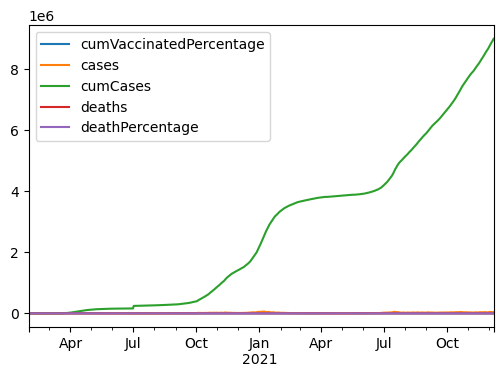

In [237]:
dateseriesdf.plot() # Generate a simple plot diagram

<AxesSubplot:>

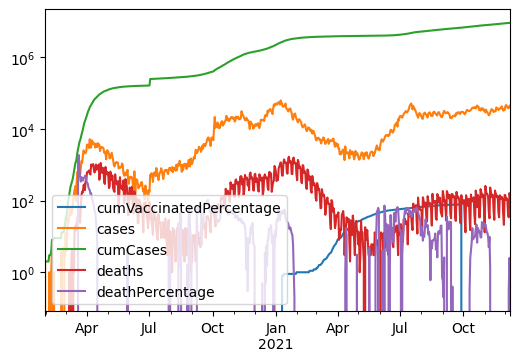

In [238]:
dateseriesdf.plot(logy=True)

In [239]:
def plot_random_walk(walk):
    df[walk].plot()
    plt.show()
 # important! update won't work properly without this

series_cov19=wdg.SelectMultiple(
    options=['cumVaccinatedPercentage', 'cases','cumCases','deaths','deathPercentage'],
    value=['cumVaccinatedPercentage', 'cases','cumCases','deaths','deathPercentage'],
    rows=5,
    description='Stats:',
    disabled=False
)

scale=wdg.RadioButtons(
    options=['linear', 'log'],
    value='linear', # Defaults to 'linear'
    layout={'width': 'max-content'}, # If the items' names are long
    description='Scale:',
    disabled=False
)

# replacing HBox with a VBox
controls=wdg.HBox([series_cov19, scale])

def refresh_graph():
    """ We change the value of the widget in order to force a redraw of the graph;
    this is useful when the data have been updated. This is a bit of a gimmick; it
    needs to be customised for one of your widgets. """
    current=series_cov19.value
    if current==series_cov19.options[0]:
        other=series_cov19.options[1]
    else:
        other=series_cov19.options[0]
    series_cov19.value=other # forces the redraw
    series_cov19.value=current # change it back

def dateseries_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        dateseriesdf[list(gcols)].plot(logy=logscale)
        plt.show() # important - graphs won't update if this is missing 
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

# keep calling timeseries_graph(gcols=value_of_series, gscale=value_of_scale); 
# capture output in widget graph   
graph=wdg.interactive_output(dateseries_graph, {'gcols': series_cov19, 'gscale': scale})

display(controls, graph)



Output()

In [240]:
# stack series and scale on top of each other
ctrls=wdg.VBox([series_cov19, scale])
# put the graph and the controls side by side
form=wdg.HBox([graph, ctrls])

# form contains the entire interface
display(form)

## Deploying the dashboard

Once your code is ready and you are satisfied with the appearance of the graphs, replace all the text boxes above with the explanations you would like a dashboard user to see. The next step is deploying the dashboard online - there are several [options](https://voila.readthedocs.io/en/stable/deploy.html) for this, we suggest deploying as a [Binder](https://mybinder.org/). This is basically the same technique that has been used to package this tutorial and to deploy this template dashboard. The instructions may seem a bit involved, but the actual steps are surprisingly easy - we will be going through them together during a live session. You will need an account on [GitHub](https://github.com/) for this - if you don't have one already, now it's the time to create it. 

**Author and Copyright Notice** Remember if you deploy this dashboard as a Binder it will be publicly accessible. Take credit for your work! Also acknowledge the data source: *Based on UK Government [data](https://coronavirus.data.gov.uk/) published by [Public Health England](https://www.gov.uk/government/organisations/public-health-england).*